### Experiments

#### Import Libraries

In [1]:
from utils.data_utils import split_dataset, TimeSeriesDataset
from utils.evaluation_utils import plot_multistep_forecast, evaluate_on_test_data
from utils.training_utils import train
import pandas as pd 
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

#### Import Data

In [2]:
ETTm2 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTm2.csv")
ETTm1 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTm1.csv")
ETTh1 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTh1.csv")
ETTh2 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTh2.csv")

#### Global Parameters

In [6]:
p_lag = 48
future_steps = 7
batch_size = 3
epochs = 2
learning_rate=1.e-4
decomp_kernel_size = 24
layers = 1
number_of_forecasts = 150

### 1 Layer

#### ETTm2

In [7]:
training_df, val_df, test_df = split_dataset(ETTm2)

net, res = train(
            epochs = epochs, 
            n_features=len(training_df.columns), 
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            target_column = ['OT'], 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            layers=layers, 
            get_residuals = True
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = ['OT'],p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)

Random seed set as 42
Rlinear activated
Model running on 1 Layer
Current learning rate is : 0.0001
---------------------------


loss
tensor(1.6533e+12, grad_fn=<MseLossBackward0>)
outputs
tensor([[-1865521.5000,  1219077.8750,  -512649.1562,  1716673.7500,
           952177.0000,  -652189.3125,  1255118.6250],
        [-1906592.7500,  1245915.8750,  -523935.9375,  1754466.5000,
           973138.5000,  -666548.1875,  1282750.7500],
        [-1945862.2500,  1271576.5000,  -534727.8750,  1790601.0000,
           993181.1250,  -680278.5625,  1309170.0000]], grad_fn=<AddBackward0>)
target
tensor([[42.0555, 42.0555, 41.6160, 41.6160, 41.3965, 41.1765, 41.1765],
        [42.0555, 41.6160, 41.6160, 41.3965, 41.1765, 41.1765, 41.1765],
        [41.6160, 41.6160, 41.3965, 41.1765, 41.1765, 41.1765, 41.1765]])
loss
tensor(1.6710e+12, grad_fn=<MseLossBackward0>)
outputs
tensor([[-1908089.3750,  1216370.3750,  -460478.1875,  1748811.3750,
           930778.3125,  -609790.0000,  1254934.8750],
        [-1948911.6250,  1242391.5000,  -470330.9062,  1786225.2500,
           950691.3125,  -622836.8750,  1281782.1250],
        

KeyboardInterrupt: 

In [17]:
#plt.hist(res, bins = 100)
#import statsmodels.api as sm
#sm.graphics.tsa.plot_acf(res, lags=100)

#### ETTm1

In [11]:
training_df, val_df, test_df = split_dataset(ETTm1)

net = train(
            epochs = epochs, 
            n_features=len(training_df.columns), 
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            target_column = ['OT'], 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            layers=layers
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = ['OT'],p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps)
evaluate_on_test_data(test_data = test_data, neural_net = net)

/workspaces/time_series_experiment/utils/data_utils.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_df = transform_date_column_and_drop_it(data[data['date'] > data['date'].min() + pd.DateOffset(months=train_split_month)][data['date'] < data['date'].min() + pd.DateOffset(months=val_split_month)],'date')
/workspaces/time_series_experiment/utils/data_utils.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df = transform_date_column_and_drop_it(data[data['date'] > data['date'].min() + pd.DateOffset(months=val_split_month)][data['date'] < data['date'].min() + pd.DateOffset(months=test_split_month)],'date')


Random seed set as 42
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 4.771285916280746
Current (running) training loss at iteration 10000 : 3.254412960791588
Current (running) training loss at iteration 15000 : 2.8125151376545428
Current (running) training loss at iteration 20000 : 2.453274022142589
Current (running) training loss at iteration 25000 : 2.284467009769678
Current (running) training loss at iteration 30000 : 2.1637370268096525

Epoch 0: 

Train metrics: -------
Running (training) loss is 1.9840504513066552.
Training MAE is 0.3527793651917065.
Training MSE is 1.988772912634258.
Training MAPE is 964252690.8462564.

Val metrics: -------
Running (validation) loss is 3.308469677409433.
Validation MAE is 0.16896356237732402.
Validation MSE is 1.1037301603957832.
Validation MAPE is 0.013684736076644917.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 1.5284138376951217
Current (running) training loss at i

KeyboardInterrupt: 

#### ETTh1

/workspaces/time_series_experiment/utils/data_utils.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_df = transform_date_column_and_drop_it(data[data['date'] > data['date'].min() + pd.DateOffset(months=train_split_month)][data['date'] < data['date'].min() + pd.DateOffset(months=val_split_month)],'date')
/workspaces/time_series_experiment/utils/data_utils.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df = transform_date_column_and_drop_it(data[data['date'] > data['date'].min() + pd.DateOffset(months=val_split_month)][data['date'] < data['date'].min() + pd.DateOffset(months=test_split_month)],'date')


Current learning rate is : 0.0001
---------------------------
Current (running) training loss at iteration 5000 : 8.258828273391723

Epoch 0: 

Train metrics: -------
Running (training) loss is 5.679786541326151.
Training MAE is 0.5411038607025013.
Training MSE is 5.722023872183819.
Training MAPE is 2005230857.9571817.

Val metrics: -------
Running (validation) loss is 6.888547878885685.
Validation MAE is 0.24989195471328626.
Validation MSE is 2.237979793637629.
Validation MAPE is 0.020472751546870258.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 2.529285926294327

Epoch 1: 

Train metrics: -------
Running (training) loss is 2.2188132806680225.
Training MAE is 0.4045559102330221.
Training MSE is 2.2735483056189967.
Training MAPE is 1923786658.5122025.

Val metrics: -------
Running (validation) loss is 5.514973369881857.
Validation MAE is 0.22209143422954444.
Validation MSE is 1.7960175836230

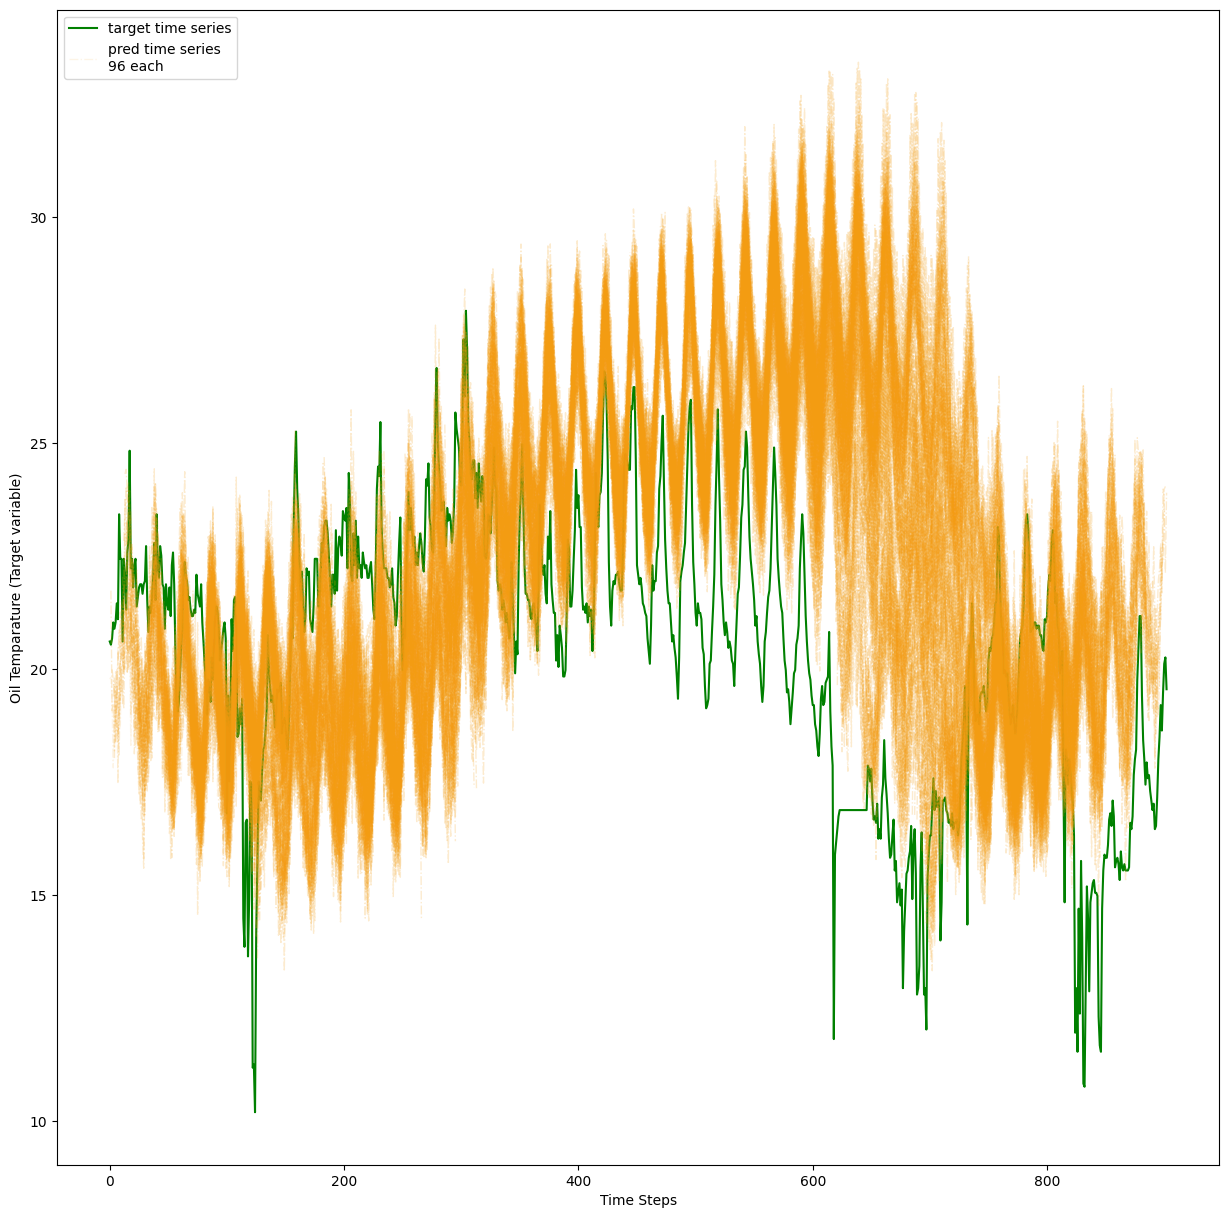

In [ ]:
training_df, val_df, test_df = split_dataset(ETTh1)

net = train(
            epochs = epochs, 
            n_features=len(training_df.columns), 
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            target_column = ['OT'], 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            layers=layers
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = ['OT'],p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps)
evaluate_on_test_data(test_data = test_data, neural_net = net)

#### ETTh2

/workspaces/time_series_experiment/utils/data_utils.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_df = transform_date_column_and_drop_it(data[data['date'] > data['date'].min() + pd.DateOffset(months=train_split_month)][data['date'] < data['date'].min() + pd.DateOffset(months=val_split_month)],'date')
/workspaces/time_series_experiment/utils/data_utils.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df = transform_date_column_and_drop_it(data[data['date'] > data['date'].min() + pd.DateOffset(months=val_split_month)][data['date'] < data['date'].min() + pd.DateOffset(months=test_split_month)],'date')


Current learning rate is : 0.0001
---------------------------
Current (running) training loss at iteration 5000 : 9.305832464694976

Epoch 0: 

Train metrics: -------
Running (training) loss is 9.164492196006044.
Training MAE is 0.7380804355794531.
Training MSE is 9.308385094173817.
Training MAPE is 334899221.0673745.

Val metrics: -------
Running (validation) loss is 6.078287250254044.
Validation MAE is 0.23054478112277754.
Validation MSE is 2.048239672551302.
Validation MAPE is 0.007546505226425819.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 4.287027441453934

Epoch 1: 

Train metrics: -------
Running (training) loss is 5.37831615363739.
Training MAE is 0.6313482947320609.
Training MSE is 5.719990892459253.
Training MAPE is 319200364.0701655.

Val metrics: -------
Running (validation) loss is 10.182855339071086.
Validation MAE is 0.2995225125723749.
Validation MSE is 3.400120904799603.
V

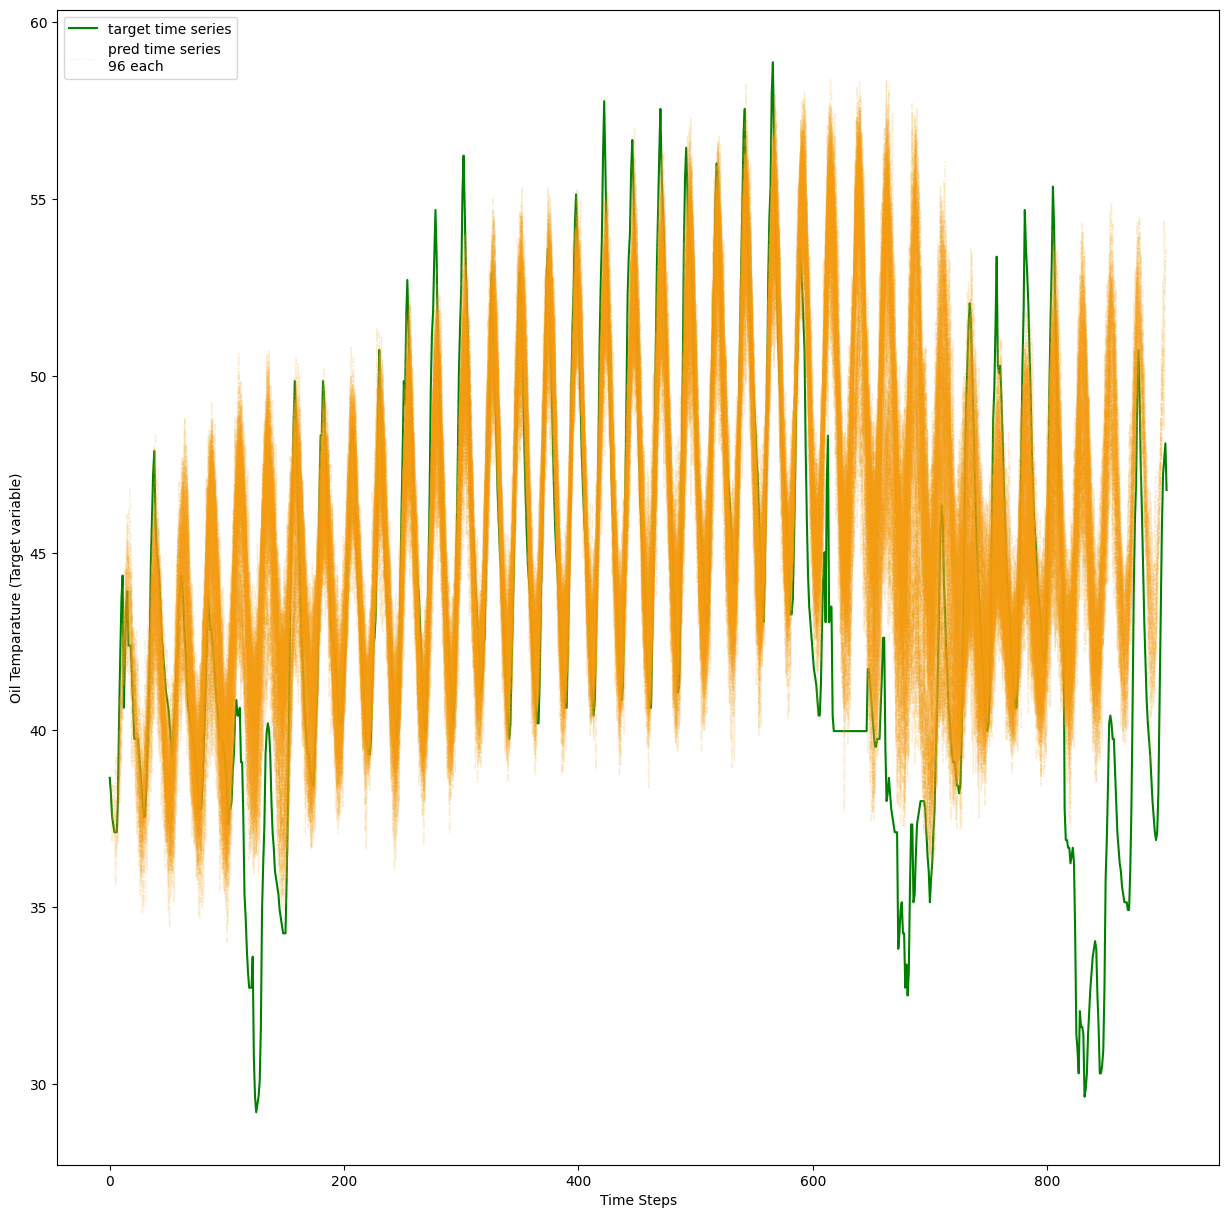

In [ ]:
training_df, val_df, test_df = split_dataset(ETTh2)

net = train(
            epochs = epochs, 
            n_features=len(training_df.columns), 
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            target_column = ['OT'], 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            layers=layers
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = ['OT'],p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps)
evaluate_on_test_data(test_data = test_data, neural_net = net)

### 2 Layers

In [4]:
p_lag = 96
future_steps = 96
batch_size = 8
epochs = 16
learning_rate=1.e-4
decomp_kernel_size = 24
layers = 2
number_of_forecasts = 150

#### ETTm2

/workspaces/time_series_experiment/utils/data_utils.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_df = transform_date_column_and_drop_it(data[data['date'] > data['date'].min() + pd.DateOffset(months=train_split_month)][data['date'] < data['date'].min() + pd.DateOffset(months=val_split_month)],'date')
/workspaces/time_series_experiment/utils/data_utils.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df = transform_date_column_and_drop_it(data[data['date'] > data['date'].min() + pd.DateOffset(months=val_split_month)][data['date'] < data['date'].min() + pd.DateOffset(months=test_split_month)],'date')


Random seed set as 42
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 5.7271804954051975
Current (running) training loss at iteration 10000 : 4.724745366483927
Current (running) training loss at iteration 15000 : 3.850156122672558
Current (running) training loss at iteration 20000 : 3.4782698920547963
Current (running) training loss at iteration 25000 : 3.2838888764572145
Current (running) training loss at iteration 30000 : 3.846875796449184

Epoch 0: 

Train metrics: -------
Running (training) loss is 3.887766376093263.
Training MAE is 0.5048644102637762.
Training MSE is 3.9061020997269944.
Training MAPE is 62147101.17207756.

Val metrics: -------
Running (validation) loss is 5.441916250092953.
Validation MAE is 0.21654565189174002.
Validation MSE is 1.8219851793514357.
Validation MAPE is 0.007116358617375818.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 2.9536408384084702
Current (running) training loss at 

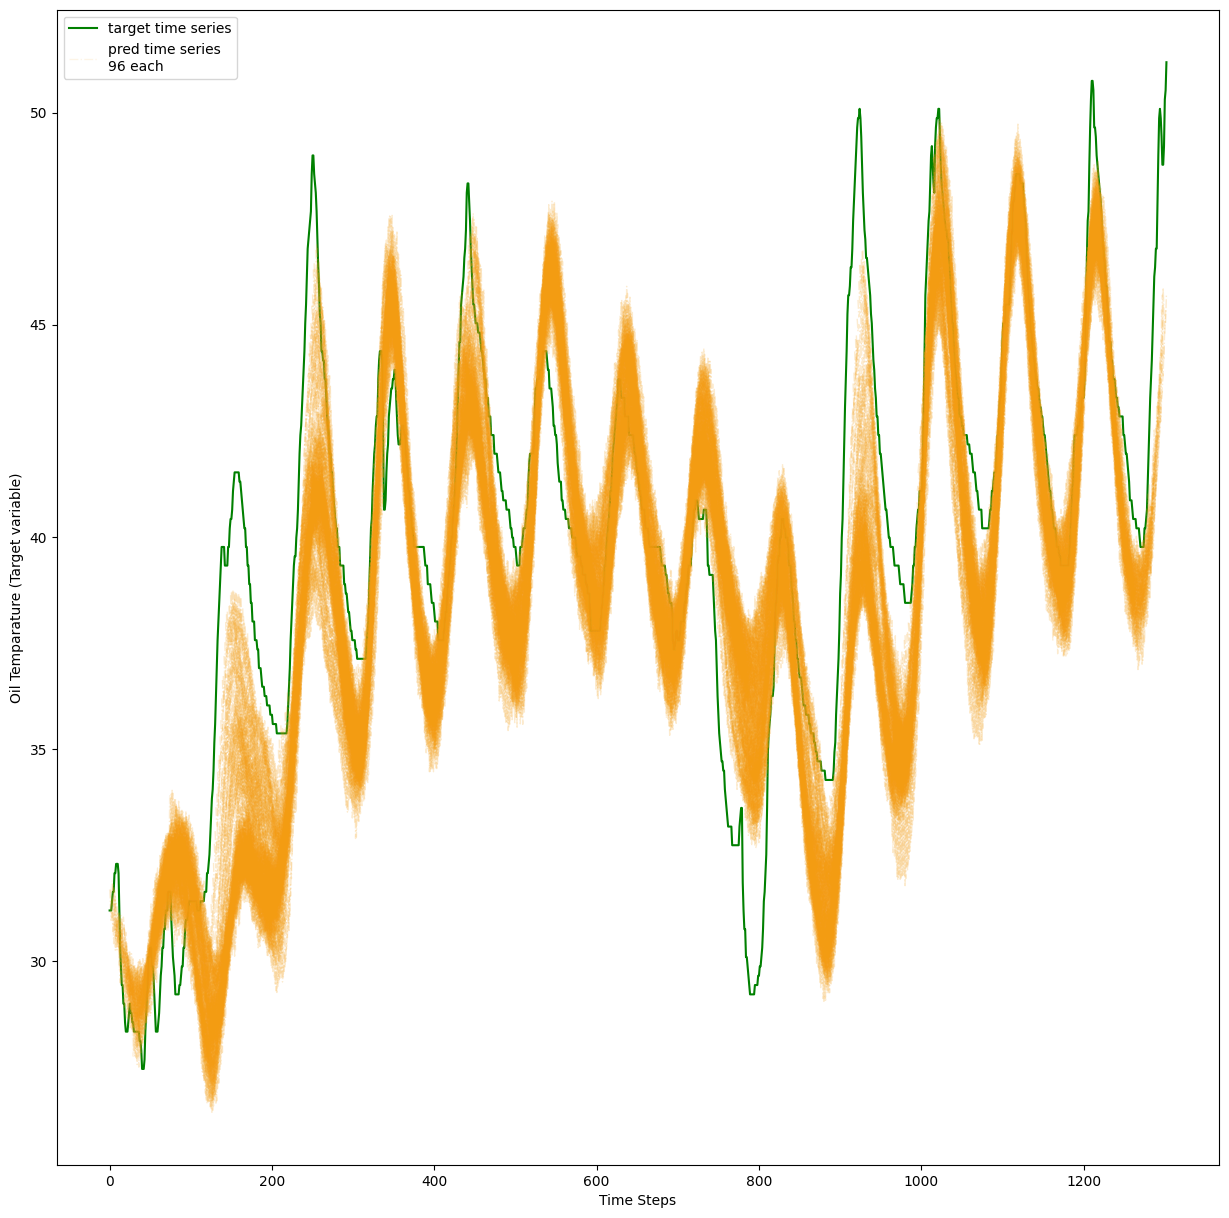

In [7]:
training_df, val_df, test_df = split_dataset(ETTm2)

net = train(
            epochs = epochs, 
            n_features=len(training_df.columns), 
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            target_column = ['OT'], 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            layers=layers
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = ['OT'],p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)

#### ETTm1

In [ ]:
training_df, val_df, test_df = split_dataset(ETTm1)

net = train(
            epochs = epochs, 
            n_features=len(training_df.columns), 
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            target_column = ['OT'], 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            layers=layers
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = ['OT'],p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)

#### ETTh1

In [ ]:
training_df, val_df, test_df = split_dataset(ETTh1)

net = train(
            epochs = epochs, 
            n_features=len(training_df.columns), 
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            target_column = ['OT'], 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            layers=layers
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = ['OT'],p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)

#### ETTh2

In [ ]:
training_df, val_df, test_df = split_dataset(ETTh2)

net = train(
            epochs = epochs, 
            n_features=len(training_df.columns), 
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            target_column = ['OT'], 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            layers=layers
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = ['OT'],p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)

#### 3 Layers

#### ETTm2

In [3]:
p_lag = 96
future_steps = 96
batch_size = 8
epochs = 16
learning_rate=1.e-4
decomp_kernel_size = 24
layers = 3
number_of_forecasts = 150

/workspaces/time_series_experiment/utils/data_utils.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_df = transform_date_column_and_drop_it(data[data['date'] > data['date'].min() + pd.DateOffset(months=train_split_month)][data['date'] < data['date'].min() + pd.DateOffset(months=val_split_month)],'date')
/workspaces/time_series_experiment/utils/data_utils.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df = transform_date_column_and_drop_it(data[data['date'] > data['date'].min() + pd.DateOffset(months=val_split_month)][data['date'] < data['date'].min() + pd.DateOffset(months=test_split_month)],'date')


Random seed set as 42
Model running on 3 Layers
Current learning rate is : 0.0001
---------------------------
Current (running) training loss at iteration 5000 : 8.74549384417534
Current (running) training loss at iteration 10000 : 6.256234547305107
Current (running) training loss at iteration 15000 : 4.898651600362857
Current (running) training loss at iteration 20000 : 4.3454871904507275
Current (running) training loss at iteration 25000 : 4.029556205729246
Current (running) training loss at iteration 30000 : 4.480289509998759

Epoch 0: 

Train metrics: -------
Running (training) loss is 4.4553152999675625.
Training MAE is 0.5300846186477632.
Training MSE is 4.465930550814161.
Training MAPE is 61172055.942579746.

Val metrics: -------
Running (validation) loss is 5.257291439019508.
Validation MAE is 0.2121359988263679.
Validation MSE is 1.758686102574385.
Validation MAPE is 0.0070548583303353275.
---------------------------
Current learning rate is : 5e-05
---------------------------

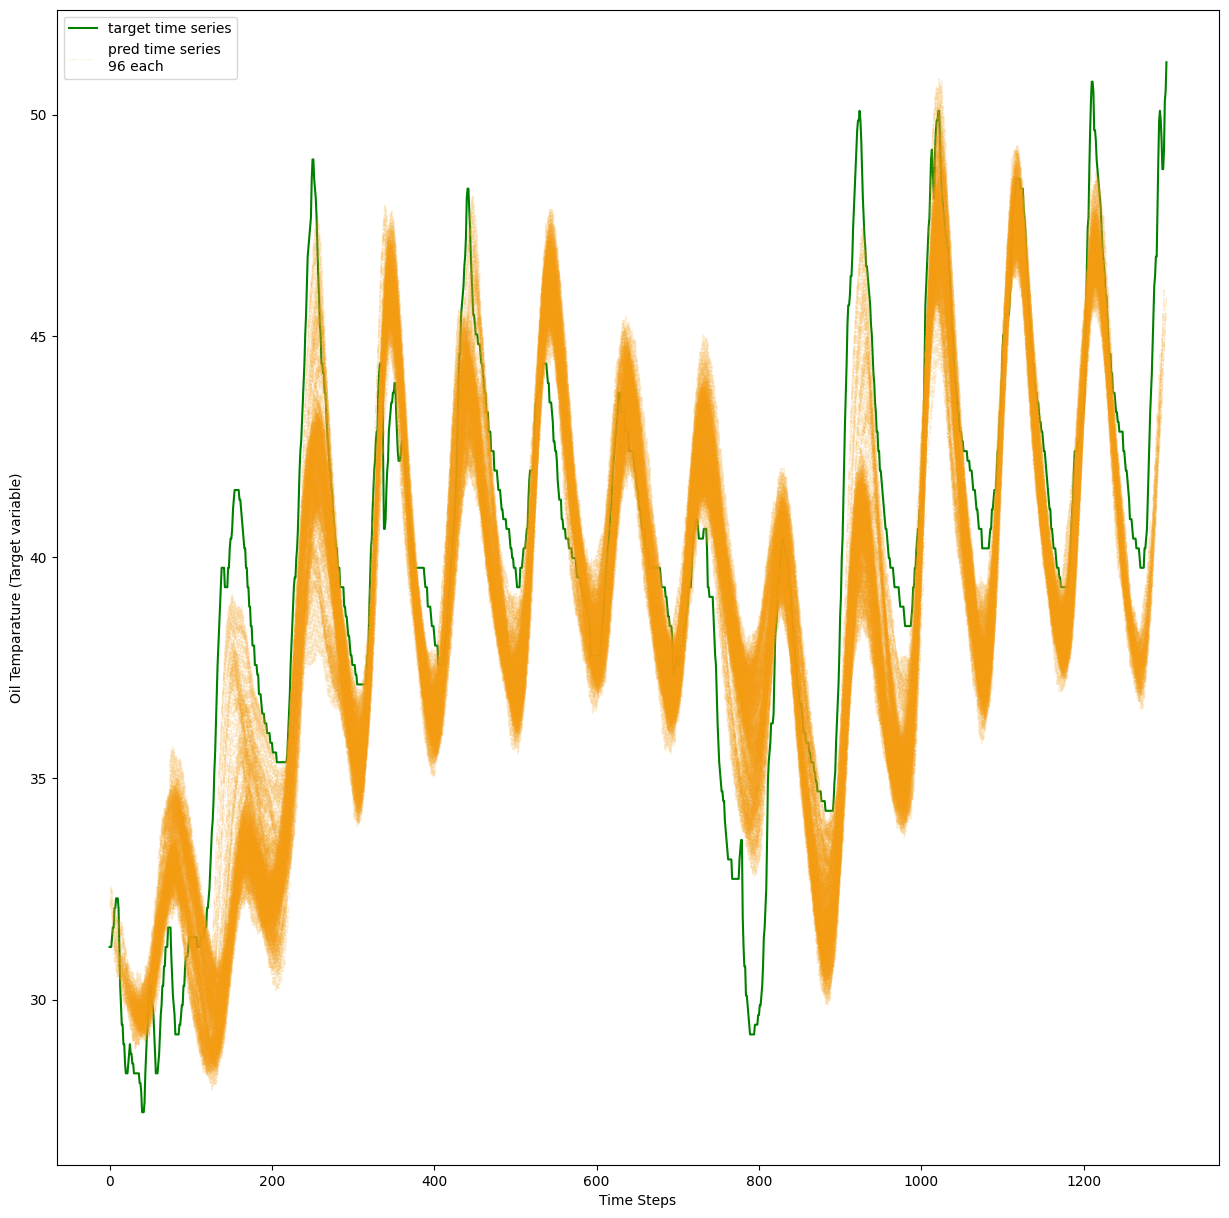

In [4]:
training_df, val_df, test_df = split_dataset(ETTm2)

net = train(
            epochs = epochs, 
            n_features=len(training_df.columns), 
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            target_column = ['OT'], 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            layers=layers
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = ['OT'],p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)